# Limpieza de Datos

### Carga de Datos

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [91]:
import sys
from pathlib import Path

# Agregar la carpeta raíz al path para poder importar
carpeta_raiz = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(carpeta_raiz))

# Importar las funciones
from funciones_save_load import guardar_parquet, cargar_parquet

# Usar las funciones
icfes = cargar_parquet("icfes_carga_inicial.parquet")
icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
378922,CC,COLOMBIA,M,2000,No,Sin Estrato,5 a 6,Dos,Primaria incompleta,Ninguno,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Peor,30 minutos o menos,30 minutos o menos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,NOCHE,CERETÉ,CORDOBA,51,45,31,35,31.0,199,32.097405,1.0,2.0
283538,TI,COLOMBIA,M,2002,No,Estrato 3,1 a 2,Tres,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta,"Trabaja como profesional (por ejemplo médico, ...",Es dueño de un negocio pequeño (tiene pocos em...,Si,No,Si,Si,Si,Si,No,Si,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,54,49,50,48,46.0,250,58.339888,3.0,3.0
135887,TI,COLOMBIA,M,2004,No,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...","Trabaja en el hogar, no trabaja o estudia",No,No,Si,Si,Si,No,Si,No,11 A 25 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Mejor,30 minutos o menos,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,RURAL,UNICA,DUITAMA,BOYACA,53,58,55,57,41.0,273,47.844313,2.0,2.0
121935,TI,COLOMBIA,F,2004,No,Estrato 3,3 a 4,Dos,Educación profesional completa,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,No,No,Si,No,MÁS DE 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,No leo por entretenimiento,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,TARDE,PEREIRA,RISARALDA,51,48,60,42,45.0,249,63.819926,3.0,3.0
264827,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,No,No,Si,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,Menos de 10 horas,No,MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,44,45,48,48,36.0,227,50.251379,2.0,2.0
240124,TI,COLOMBIA,F,2003,No,Estrato 3,3 a 4,Dos,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Es operario de máquinas o conduce vehículos (t...,Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,Si,Si,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Más de 3 horas,Entre 21 y 30 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,48,54,42,36,48.0,226,58.232004,3.0,3.0


### 1. Renombrar Variables

In [92]:
icfes.sample(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
234786,TI,COLOMBIA,F,2004,No,Estrato 3,5 a 6,Cinco,Primaria completa,Secundaria (Bachillerato) completa,"Es dueño de un negocio grande, tiene un cargo ...","Es dueño de un negocio grande, tiene un cargo ...",Si,Si,Si,Si,Si,Si,No,Si,MÁS DE 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,FEMENINO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,69,61,61,66,72.0,324,66.914063,4.0,3.0
478171,TI,COLOMBIA,F,2003,No,Estrato 1,7 a 8,Seis o mas,Primaria incompleta,Primaria incompleta,Es operario de máquinas o conduce vehículos (t...,"Trabaja como personal de limpieza, mantenimien...",Si,Si,No,Si,No,No,Si,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,30 minutos o menos,Entre 1 y 3 horas,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,MONTERÍA,CORDOBA,60,57,46,41,45.0,253,39.129194,1.0,2.0
60805,TI,COLOMBIA,F,2003,No,Estrato 2,3 a 4,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,"Es dueño de un negocio grande, tiene un cargo ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,None,TÉCNICO,S,URBANO,UNICA,ARJONA,BOLIVAR,44,47,44,37,45.0,216,55.150376,3.0,2.0
92004,TI,COLOMBIA,M,2003,No,Estrato 5,5 a 6,Dos,Técnica o tecnológica completa,Técnica o tecnológica completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,Si,Si,11 A 25 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,No leo por entretenimiento,30 minutos o menos,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,RURAL,MAÑANA,SANTA MARTA,MAGDALENA,52,50,43,53,38.0,243,57.895566,3.0,2.0
401415,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Tres,No Aplica,Secundaria (Bachillerato) completa,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,No,No,No,No,No,11 A 25 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,Todos o casi todos los días,Peor,No leo por entretenimiento,Entre 30 y 60 minutos,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,57,57,59,58,53.0,287,50.012510,2.0,3.0


In [93]:
icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_GENERO', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER',
       'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'ESTU_MCPIO_PRESENTACION', 

In [94]:
icfes.rename(columns= {
    'ESTU_TIPODOCUMENTO': 'tipo_documento',
    'ESTU_NACIONALIDAD': 'nacionalidad',
    'ESTU_GENERO': 'genero',
    'ESTU_FECHANACIMIENTO': 'anio_nacimiento',
    'ESTU_TIENEETNIA': 'pertenece_etnia',
    'FAMI_ESTRATOVIVIENDA': 'estrato_casa',
    'FAMI_PERSONASHOGAR': 'num_personas_casa', 
    'FAMI_CUARTOSHOGAR': 'cuartos_casa', 
    'FAMI_EDUCACIONPADRE': 'educacion_padre',
    'FAMI_EDUCACIONMADRE': 'educacion_madre', 
    'FAMI_TRABAJOLABORPADRE': 'actividad_padre',
    'FAMI_TRABAJOLABORMADRE': 'actividad_madre', 
    'FAMI_TIENEINTERNET': 'internet', 
    'FAMI_TIENESERVICIOTV': 'tv',
    'FAMI_TIENECOMPUTADOR': 'computador', 
    'FAMI_TIENELAVADORA': 'lavadora',
    'FAMI_TIENEHORNOMICROOGAS': 'microndas', 
    'FAMI_TIENEAUTOMOVIL': 'carro',
    'FAMI_TIENEMOTOCICLETA': 'moto', 
    'FAMI_TIENECONSOLAVIDEOJUEGOS': 'consola',
    'FAMI_NUMLIBROS': 'num_libros_casa', 
    'FAMI_COMELECHEDERIVADOS': 'come_derivados_leche',
    'FAMI_COMECARNEPESCADOHUEVO': 'come_carne_pescado_huevo', 
    'FAMI_COMECEREALFRUTOSLEGUMBRE': 'come_cereal_frutas_legumbres',
    'FAMI_SITUACIONECONOMICA': 'situacion_economica', 
    'ESTU_DEDICACIONLECTURADIARIA': 'cuanto_lee',
    'ESTU_DEDICACIONINTERNET': 'cuanto_navega_web', 
    'ESTU_HORASSEMANATRABAJA': 'horas_trabajo_semanal',
    'ESTU_TIPOREMUNERACION': 'tipo_pago_trabajo', 
    'COLE_GENERO': 'colegio_genero', 
    'COLE_NATURALEZA': 'colegio_oficial',
    'COLE_CALENDARIO': 'colegio_calendario', 
    'COLE_BILINGUE': 'colegio_bilingue', 
    'COLE_CARACTER': 'tipo_colegio',
    'COLE_SEDE_PRINCIPAL': 'colegio_sede_principal', 
    'COLE_AREA_UBICACION': 'colegio_urbano_rural', 
    'COLE_JORNADA': 'colegio_jornada',
    'ESTU_MCPIO_PRESENTACION': 'mpio_colegio', 
    'ESTU_DEPTO_PRESENTACION': 'dpto_colegio',
    'PUNT_LECTURA_CRITICA': 'puntaje_lectura', 
    'PUNT_MATEMATICAS': 'puntaje_matematicas', 
    'PUNT_C_NATURALES': 'puntaje_naturales',  
    'PUNT_SOCIALES_CIUDADANAS': 'puntaje_sociales',
    'PUNT_INGLES': 'puntaje_ingles', 
    'PUNT_GLOBAL': 'puntaje_global',
    'ESTU_INSE_INDIVIDUAL': 'inse_estudiante', 
    'ESTU_NSE_INDIVIDUAL': 'nse_estudiantes',
    'ESTU_NSE_ESTABLECIMIENTO': 'nse_colegio'
}, inplace=True)

icfes.sample(6)

,tipo_documento,nacionalidad,genero,anio_nacimiento,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio
270217,TI,COLOMBIA,F,2000,No,Estrato 2,3 a 4,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,None,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,SABATINA,ZARAGOZA,ANTIOQUIA,34,38,28,39,38.0,175,44.845503,2.0,2.0
165215,TI,COLOMBIA,F,2004,No,Estrato 1,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,S,URBANO,MAÑANA,BUENAVENTURA,VALLE,60,54,47,50,50.0,263,52.802392,3.0,2.0
204886,CC,COLOMBIA,F,2001,No,Estrato 1,3 a 4,Tres,Ninguno,Ninguno,"Es agricultor, pesquero o jornalero",Es vendedor o trabaja en atención al público,No,No,Si,No,Si,Si,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Mejor,Entre 1 y 2 horas,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,NOCHE,PUERTO BERRÍO,ANTIOQUIA,35,38,32,31,34.0,170,40.742372,1.0,2.0
114173,TI,COLOMBIA,M,2004,No,Estrato 1,5 a 6,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero",Es vendedor o trabaja en atención al público,No,Si,No,No,Si,No,Si,No,11 A 25 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,Entre 11 y 20 horas,"Si, en efectivo y especie",MIXTO,OFICIAL,A,None,TÉCNICO,S,RURAL,UNICA,PAZ DE ARIPORO,CASANARE,53,56,56,41,45.0,255,41.277203,2.0,1.0
97955,TI,COLOMBIA,M,2003,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,57,49,43,41,40.0,235,NaN,NaN,3.0
282985,TI,COLOMBIA,F,2004,No,Estrato 1,3 a 4,Dos,No Aplica,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,"Es agricultor, pesquero o jornalero",No,Si,No,No,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,Todos o casi todos los días,Igual,No leo por entretenimiento,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,PASTO,NARIÑO,55,46,48,52,39.0,247,38.031318,1.0,2.0


### 2. Duplicados

In [95]:
print(f"Total de filas duplicadas: {icfes.duplicated().sum()}")

Total de filas duplicadas: 2


In [96]:
duplicados = icfes[icfes.duplicated(keep=False)]  # keep=False muestra TODAS las copias
print(f"Hay {len(duplicados):,} filas que aparecen duplicadas (contando todas las copias)")

# Ver las primeras 10
duplicados.head(10)

Hay 4 filas que aparecen duplicadas (contando todas las copias)


,tipo_documento,nacionalidad,genero,anio_nacimiento,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio
367644,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,"Trabaja como personal de limpieza, mantenimien...",Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,No,No,No,No,11 A 25 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Peor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,50,62,53,49,56.0,268,50.308181,2.0,3.0
422598,TI,COLOMBIA,M,2002,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,NOCHE,MEDELLÍN,ANTIOQUIA,0,0,0,26,0.0,30,NaN,NaN,2.0
422608,TI,COLOMBIA,M,2002,No,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,NOCHE,MEDELLÍN,ANTIOQUIA,0,0,0,26,0.0,30,NaN,NaN,2.0
426786,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,"Trabaja como personal de limpieza, mantenimien...",Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,No,No,No,No,11 A 25 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Peor,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,50,62,53,49,56.0,268,50.308181,2.0,3.0


In [97]:
icfes = icfes.drop_duplicates()
print(f"Total de filas duplicadas: {icfes.duplicated().sum()}")

Total de filas duplicadas: 0


### 3. Rango de valores válidos

In [98]:
icfes.sample(6)

,tipo_documento,nacionalidad,genero,anio_nacimiento,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio
290997,TI,COLOMBIA,F,2003,No,Estrato 1,1 a 2,Uno,No Aplica,Técnica o tecnológica completa,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,No,No,No,Si,No,No,Si,No,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Igual,30 minutos o menos,Entre 30 y 60 minutos,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,CÚCUTA,NORTE SANTANDER,40,44,33,39,41.0,196,43.104013,2.0,2.0
99894,TI,COLOMBIA,M,2003,No,Estrato 1,3 a 4,Tres,No sabe,Secundaria (Bachillerato) completa,No sabe,"Es agricultor, pesquero o jornalero",Si,No,Si,No,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,GRANADA,META,40,35,47,30,53.0,196,39.165000,1.0,2.0
405314,TI,COLOMBIA,M,2002,No,Estrato 2,5 a 6,Tres,Primaria incompleta,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero",Es dueño de un negocio pequeño (tiene pocos em...,No,No,No,No,No,No,Si,No,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Mejor,Entre 30 y 60 minutos,30 minutos o menos,Entre 11 y 20 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,N,RURAL,COMPLETA,LA PLATA,HUILA,55,63,55,60,47.0,287,40.700968,1.0,1.0
258550,TI,COLOMBIA,M,2002,No,Estrato 1,5 a 6,Tres,Secundaria (Bachillerato) incompleta,Primaria incompleta,No sabe,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Peor,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,ACACÍAS,META,47,64,53,59,44.0,274,49.740469,2.0,2.0
284570,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Tres,No sabe,No sabe,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",Si,No,Si,Si,Si,Si,No,No,26 A 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,DUITAMA,BOYACA,74,78,74,70,75.0,370,57.102784,3.0,4.0
85833,TI,COLOMBIA,M,2003,No,Estrato 1,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,Si,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Más de 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,SAN SEBASTIÁN DE MARIQUITA,TOLIMA,51,50,53,53,47.0,257,55.598389,3.0,2.0


In [99]:
cat_vars = icfes.select_dtypes(include='object')

for col in cat_vars.columns:
    print(icfes[col].value_counts().sort_index().head(15))   # o .head(20)
    print("-" * 60)

tipo_documento
CC       83373
CE        1096
CR        4923
NES       1454
NUIP         2
PC           3
PE          74
PEP        417
RC          14
TI      413512
V            2
Name: count, dtype: int64
------------------------------------------------------------
nacionalidad
ALEMANIA                1
ARABIA SAUDITA          1
ARGENTINA               8
ARUBA                   1
BOLIVIA                 3
BRASIL                  8
CABO VERDE              2
CANADÁ                  1
CHILE                   3
CHINA                   2
COLOMBIA           501706
COREA DEL NORTE         1
COREA DEL SUR           3
COSTA RICA              7
CUBA                    9
Name: count, dtype: int64
------------------------------------------------------------
genero
F    276572
M    228290
Name: count, dtype: int64
------------------------------------------------------------
pertenece_etnia
No    469936
Si     31941
Name: count, dtype: int64
---------------------------------------------------------

In [100]:
num_vars = icfes.select_dtypes(include=('int64', 'float'))

for col in num_vars:
    print(icfes[col].value_counts().sort_index().head(15))
    print("=" * 60)

anio_nacimiento
1        3
2        4
3        5
4        2
1195     1
1900    13
1939     1
1940     1
1941     1
1944     1
1945     2
1946     2
1947     1
1948     4
1949     2
Name: count, dtype: int64
puntaje_lectura
0      196
22      10
23      30
24      97
25     157
26     318
27     536
28     779
29    1211
30    1738
31    2289
32    3073
33    3808
34    4868
35    5891
Name: count, dtype: int64
puntaje_matematicas
0      182
17      25
18      84
19     155
20     265
21     390
22     573
23     721
24     932
25    1212
26    1531
27    1983
28    2324
29    2814
30    3468
Name: count, dtype: int64
puntaje_naturales
0       391
23        1
24      101
25      432
26      841
27     1357
28     2200
29     3265
30     4478
31     6021
32     7483
33     8891
34    10164
35    11810
36    12802
Name: count, dtype: int64
puntaje_sociales
0      190
19       1
20     106
21     255
22     436
23     710
24    1135
25    1742
26    2361
27    3159
28    4097
29    5278
30

#### Corrigiendo los años de nacimiento

In [101]:
icfes['anio_nacimiento'].value_counts(dropna=False).sort_index()

anio_nacimiento
1        3
2        4
3        5
4        2
1195     1
        ..
2014     8
2015     3
2018     2
2019     3
2020    80
Name: count, Length: 84, dtype: int64

In [102]:
icfes[(icfes['anio_nacimiento'] < 1939) | (icfes['anio_nacimiento'] > 2006)]

,tipo_documento,nacionalidad,genero,anio_nacimiento,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio
1284,PEP,VENEZUELA,M,2013,No,Estrato 4,3 a 4,Dos,No sabe,No sabe,"Es dueño de un negocio grande, tiene un cargo ...",Es vendedor o trabaja en atención al público,Si,Si,Si,Si,Si,Si,No,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Mejor,30 minutos o menos,Más de 3 horas,0,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,63,54,67,59,76.0,310,67.171655,4.0,3.0
2519,NES,VENEZUELA,F,2007,No,Estrato 1,3 a 4,Dos,Primaria completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,CALI,VALLE,50,63,52,61,54.0,282,47.663285,2.0,2.0
3095,TI,COLOMBIA,F,2020,No,Estrato 1,5 a 6,Cuatro,Primaria incompleta,Primaria incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,Si,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,No,MIXTO,OFICIAL,A,N,TÉCNICO,S,URBANO,NOCHE,RIOSUCIO,CALDAS,48,33,35,41,43.0,198,33.096566,1.0,2.0
3315,CE,VENEZUELA,F,2008,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Es vendedor o trabaja en atención al público,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Peor,30 minutos o menos,No Navega Internet,0,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,TARDE,SOLEDAD,ATLANTICO,46,50,49,45,37.0,233,48.115187,2.0,2.0
3651,NES,VENEZUELA,M,2013,No,Estrato 2,3 a 4,Dos,Primaria incompleta,Postgrado,"Trabaja como personal de limpieza, mantenimien...",Trabaja por cuenta propia (por ejemplo plomero...,Si,No,Si,No,Si,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,49,50,51,52,47.0,251,49.384147,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489965,TI,COLOMBIA,F,2014,No,Estrato 2,3 a 4,Dos,Secundaria (Bachillerato) completa,Educación profesional completa,"Trabaja como personal de limpieza, mantenimien...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,No,No,No,No,No,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,1 o 2 veces por semana,Peor,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,TARDE,BOGOTÁ D.C.,BOGOTÁ,39,55,43,40,40.0,220,47.489521,2.0,3.0
498029,TI,COLOMBIA,F,2013,No,Estrato 3,5 a 6,Seis o mas,Primaria completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi 

In [103]:
import numpy as np

def corregir_anio_nacimiento(row):
    anio = row['anio_nacimiento']
    
    # Si es NaN o valor absurdo
    if pd.isna(anio):
        return np.nan
    
    anio = int(anio)
    
    # Caso 1: años 1, 2, 3, 4 → claramente son 2001, 2002, 2003, 2004
    if 1 <= anio <= 9:
        return 2000 + anio
    
    # Caso 2: año 2020 y tiene cédula → imposible para un menor → es el año del examen
    if anio == 2020 and row['tipo_documento'] == 'CC':
        # estimamos edad típica con cédula: 18–25 años → nació entre 1995–2002
        return np.random.randint(1995, 2003)
    
    # Caso 3: año 2020 pero es TI (tarjeta identidad) → sí puede ser menor de edad
    # → probablemente nació entre 2001–2004
    if anio == 2020 and row['tipo_documento'] == 'TI':
        return np.random.randint(2001, 2005)
    
    # Caso 4: años 1900–1930 → valor por defecto → imputamos por mediana del estrato o colegio
    if 1900 <= anio <= 1930:
        return np.nan  # lo dejaremos para imputar después por grupo
    
    # Caso 5: años imposibles (< 1950 o > 2010) → marcamos como NaN
    if anio < 1950 or anio > 2010:
        return np.nan
    
    # Si no cae en ningún caso raro → lo dejamos como está
    return anio

# Aplicar la función
icfes['anio_nacimiento_corregido'] = icfes.apply(corregir_anio_nacimiento, axis=1)

In [104]:
icfes['anio_nacimiento_corregido'].value_counts().sort_index()

anio_nacimiento_corregido
1950.0      3
1951.0      7
1952.0      6
1953.0     15
1954.0     10
         ... 
2006.0    159
2007.0     31
2008.0     24
2009.0     25
2010.0     29
Name: count, Length: 61, dtype: int64

In [105]:
icfes['edad'] = 2020 - icfes['anio_nacimiento_corregido'].astype('float')
icfes['edad'].value_counts()

edad
17.0    214712
16.0    111088
18.0    102686
19.0     41805
20.0     12451
         ...  
66.0        10
69.0         7
65.0         7
68.0         6
70.0         3
Name: count, Length: 61, dtype: int64

In [106]:
icfes = icfes.drop(columns=['anio_nacimiento', 'anio_nacimiento_corregido'],
                   errors='ignore')
icfes.sample(6)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
39948,TI,COLOMBIA,M,No,Estrato 2,1 a 2,Uno,Primaria incompleta,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,No,No,No,Si,No,Si,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,ACADÉMICO,S,RURAL,UNICA,VALLE DEL GUAMUEZ,PUTUMAYO,57,47,40,44,48.0,235,34.570506,1.0,1.0,17.0
47514,CC,COLOMBIA,M,Si,Sin Estrato,5 a 6,Cuatro,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",Si,Si,Si,Si,Si,No,No,None,MÁS DE 100 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 30 y 60 minutos,Más de 3 horas,Entre 21 y 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,GUAPÍ,CAUCA,30,42,28,30,39.0,165,54.630514,3.0,2.0,19.0
171804,TI,COLOMBIA,M,No,Estrato 2,1 a 2,Tres,Educación profesional completa,Educación profesional completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Todos o casi todos los días,Peor,30 minutos o menos,Entre 30 y 60 minutos,0,"Si, en especie",MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,TARDE,CURUMANÍ,CESAR,53,54,48,45,32.0,243,65.116613,4.0,2.0,16.0
208344,TI,COLOMBIA,F,No,Estrato 3,5 a 6,Tres,Primaria incompleta,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja en el hogar, no trabaja o estudia",No,No,Si,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Más de 3 horas,Entre 21 y 30 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,MAGANGUÉ,BOLIVAR,40,39,38,36,47.0,195,43.080836,2.0,2.0,18.0
92545,TI,COLOMBIA,M,No,Estrato 2,7 a 8,Seis o mas,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,Si,Si,Si,26 A 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Igual,No leo por entretenimiento,Entre 1 y 3 horas,0,No,MIXTO,NO OFICIAL,A,N,TÉCNICO,S,URBANO,UNICA,BOGOTÁ D.C.,BOGOTÁ,61,69,53,56,72.0,303,57.107421,3.0,3.0,16.0
21023,TI,COLOMBIA,M,No,Estrato 2,5 a 6,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,No,Si,Si,Si,No,No,No,26 A 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,VILLAVICENCIO,META,59,55,60,49,57.0,279,54.069498,3.0,2.0,16.0


### 4. Estandarizar categorías de variables

In [107]:
icfes.sample(5)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
278210,TI,COLOMBIA,M,No,Estrato 4,3 a 4,Dos,Educación profesional completa,Educación profesional completa,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,Si,No,Si,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Peor,Más de 2 horas,Entre 30 y 60 minutos,0,No,MIXTO,NO OFICIAL,A,N,ACADÉMICO,S,URBANO,UNICA,BOGOTÁ D.C.,BOGOTÁ,53,45,32,44,48.0,219,75.932067,4.0,4.0,18.0
20983,TI,COLOMBIA,M,No,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,30 minutos o menos,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,NOCHE,MÁLAGA,SANTANDER,50,50,36,46,38.0,225,48.145945,2.0,2.0,18.0
52378,TI,COLOMBIA,F,No,Estrato 1,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia",Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,30 minutos o menos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,TARDE,ARAUCA,ARAUCA,50,42,51,46,44.0,235,51.927000,3.0,2.0,16.0
50652,TI,COLOMBIA,F,No,Estrato 5,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",No,Si,No,No,No,No,Si,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,VALLE DEL GUAMUEZ,PUTUMAYO,59,44,51,51,47.0,255,38.151604,1.0,2.0,16.0
202207,CC,COLOMBIA,F,No,Estrato 3,1 a 2,Dos,No sabe,Primaria completa,No sabe,Es vendedor o trabaja en atención al público,Si,Si,Si,Si,No,No,No,No,11 A 25 LIBROS,Nunca o rara vez comemos eso,3 a 5 veces por semana,1 o 2 veces por semana,Peor,30 minutos o menos,None,0,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,MAÑANA,CALI,VALLE,51,42,36,34,40.0,203,49.378165,2.0,3.0,19.0


In [108]:
vars_cat = ['tipo_documento', 'nacionalidad', 'genero', 'pertenece_etnia', 'estrato_casa', 'educacion_padre', 'educacion_madre',
            'actividad_padre', 'actividad_madre', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro','moto', 'consola',
            'num_libros_casa', 'come_derivados_leche', 'come_carne_pescado_huevo', 'come_cereal_frutas_legumbres', 'situacion_economica',
            'cuanto_lee', 'cuanto_navega_web', 'horas_trabajo_semanal', 'tipo_pago_trabajo', 'colegio_genero', 'colegio_oficial',
            'colegio_calendario', 'colegio_bilingue', 'tipo_colegio', 'colegio_sede_principal', 'colegio_urbano_rural', 'colegio_jornada',
            'mpio_colegio', 'dpto_colegio']

icfes[vars_cat] = icfes[vars_cat].astype('category')

In [109]:
variables_estandarizar = ['nacionalidad', 'pertenece_etnia', 'estrato_casa', 'educacion_padre', 'educacion_madre',
            'actividad_padre', 'actividad_madre', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro',
            'moto', 'consola', 'num_libros_casa', 'come_derivados_leche', 'come_carne_pescado_huevo', 'come_cereal_frutas_legumbres', 
            'situacion_economica', 'cuanto_lee', 'cuanto_navega_web', 'horas_trabajo_semanal', 'tipo_pago_trabajo', 'colegio_genero', 
            'colegio_oficial', 'colegio_calendario', 'colegio_bilingue', 'tipo_colegio', 'colegio_sede_principal', 'colegio_urbano_rural', 
            'colegio_jornada', 'mpio_colegio', 'dpto_colegio']

icfes[variables_estandarizar] = icfes[variables_estandarizar].apply(lambda x: x.str.capitalize() if x.dtype == "category" else x)
icfes.sample(8)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
244987,TI,Colombia,F,No,Estrato 1,5 a 6,Tres,Técnica o tecnológica completa,Primaria incompleta,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,Si,No,26 a 100 libros,1 o 2 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,Menos de 10 horas,No,Mixto,Oficial,A,N,Académico,S,Urbano,Completa,Cáceres,Antioquia,54,55,49,55,38.0,260,47.379896,2.0,2.0,16.0
114417,TI,Colombia,F,No,Estrato 2,3 a 4,Cuatro,Primaria incompleta,Primaria incompleta,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em...,Si,No,Si,Si,Si,No,Si,Si,0 a 10 libros,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Peor,No leo por entretenimiento,Entre 30 y 60 minutos,0,"Si, en especie",Mixto,Oficial,A,NaN,Técnico/académico,N,Urbano,Mañana,Villavicencio,Meta,51,53,44,46,34.0,237,51.242580,3.0,2.0,17.0
261179,TI,Colombia,M,No,Estrato 1,5 a 6,Tres,Secundaria (bachillerato) completa,Secundaria (bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Es vendedor o trabaja en atención al público,Si,No,Si,No,No,No,Si,No,11 a 25 libros,3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Peor,Entre 30 y 60 minutos,Entre 1 y 3 horas,Entre 11 y 20 horas,"Si, en efectivo",Mixto,Oficial,A,N,Académico,S,Urbano,Tarde,Bogotá d.c.,Bogotá,53,53,49,46,36.0,246,47.750013,2.0,2.0,19.0
192509,TI,Colombia,F,No,Estrato 1,3 a 4,Dos,Primaria completa,Primaria completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,11 a 25 libros,Todos o casi todos los días,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,30 minutos o menos,Más de 3 horas,Entre 21 y 30 horas,"Si, en efectivo",Mixto,Oficial,A,N,Técnico,S,Urbano,Tarde,Manatí,Atlantico,40,40,30,37,43.0,186,39.315775,1.0,2.0,16.0
235311,TI,Colombia,F,No,Sin estrato,7 a 8,Cuatro,Primaria incompleta,Primaria completa,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,No,No,0 a 10 libros,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Nunca o rara vez comemos eso,Igual,Entre 1 y 2 horas,30 minutos o menos,Menos de 10 horas,No,Mixto,Oficial,A,NaN,Técnico,S,Rural,Unica,Nunchía,Casanare,33,39,37,33,37.0,178,33.246324,1.0,1.0,17.0
217614,TI,Colombia,F,No,Estrato 1,5 a 6,Tres,Primaria incompleta,Secundaria (bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,Si,Si,No,Más de 100 libros,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,Mixto,Oficial,A,N,Técnico/académico,S,Urbano,Sabatina,Pitalito,Huila,47,45,44,35,42.0,213,51.571601,3.0,2.0,18.0
6456,TI,Colombia,M,No,Estrato 1,5 a 6,Cuatro,Primaria incompleta,Secundaria (bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Es vendedor o trabaja en atención al público,No,Si,No,No,No,No,No,No,11 a 25 libros,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,0,No,Mixto,Oficial,A,N,Técnico,S,Rural,Unica,La primavera,Vichada,60

#### 4.1 Homogenización de categorías

In [110]:
icfes['genero'].value_counts(dropna=False)

genero
F      276572
M      228290
NaN         8
Name: count, dtype: int64

In [111]:
icfes['genero'] = icfes['genero'].map({'F': 'Femenino', 'M': 'Masculino'}).fillna('Masculino')

icfes['genero'].value_counts(dropna=False)

genero
Femenino     276572
Masculino    228298
Name: count, dtype: int64

In [112]:
icfes['colegio_bilingue'].value_counts(dropna=False)

colegio_bilingue
N      416665
NaN     83006
S        5199
Name: count, dtype: int64

In [113]:
icfes['colegio_bilingue'] = icfes['colegio_bilingue'].map({'N': 'No', 'S': 'Si'}).fillna('No')
icfes['colegio_bilingue'].value_counts(dropna=False)

colegio_bilingue
No    499671
Si      5199
Name: count, dtype: int64

In [114]:
icfes['colegio_sede_principal'].value_counts(dropna=False)

colegio_sede_principal
S    480831
N     24039
Name: count, dtype: int64

In [115]:
icfes['colegio_sede_principal'] = icfes['colegio_sede_principal'].map({'N': 'No', 'S': 'Si'})
icfes['colegio_sede_principal'].value_counts(dropna=False)

colegio_sede_principal
Si    480831
No     24039
Name: count, dtype: int64

#### 4.2 Recodificación Semántica

In [116]:
icfes.sample(8)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
472429,TI,Colombia,Masculino,No,Estrato 3,3 a 4,Dos,Educación profesional completa,Técnica o tecnológica completa,Es dueño de un negocio pequeño (tiene pocos em...,Es vendedor o trabaja en atención al público,Si,Si,Si,Si,Si,No,No,Si,0 a 10 libros,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Peor,No leo por entretenimiento,Más de 3 horas,Entre 21 y 30 horas,"Si, en efectivo",Mixto,No oficial,A,No,Académico,Si,Urbano,Mañana,Medellín,Antioquia,62,60,59,66,47.0,303,59.732005,3.0,3.0,18.0
479511,CC,Colombia,Femenino,Si,Estrato 1,3 a 4,Dos,Secundaria (bachillerato) completa,Secundaria (bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,Si,No,Si,No,0 a 10 libros,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,No,Mixto,Oficial,A,No,Académico,Si,Rural,Unica,Sahagún,Cordoba,43,44,42,45,41.0,217,43.670685,2.0,1.0,18.0
375164,TI,Colombia,Masculino,No,Estrato 2,3 a 4,Cuatro,No sabe,Secundaria (bachillerato) incompleta,No sabe,Es vendedor o trabaja en atención al público,Si,Si,No,Si,Si,No,No,No,11 a 25 libros,Todos o casi todos los días,Todos o casi todos los días,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Unica,Medellín,Antioquia,47,46,43,47,52.0,231,50.774547,2.0,3.0,18.0
437202,TI,Colombia,Masculino,No,Estrato 2,3 a 4,Dos,Técnica o tecnológica completa,Secundaria (bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,0 a 10 libros,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Peor,30 minutos o menos,Más de 3 horas,0,No,Mixto,Oficial,A,No,Técnico,Si,Urbano,Unica,Soledad,Atlantico,56,34,58,56,67.0,261,52.931721,3.0,3.0,17.0
174787,TI,Colombia,Femenino,No,Estrato 2,7 a 8,Seis o mas,Primaria incompleta,Primaria completa,"Es agricultor, pesquero o jornalero","Es agricultor, pesquero o jornalero",No,Si,No,No,No,No,Si,No,0 a 10 libros,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Entre 21 y 30 horas,"Si, en efectivo",Mixto,Oficial,A,No,Técnico,Si,Rural,Unica,Piendamó - tunía,Cauca,38,40,35,37,35.0,187,33.749187,1.0,1.0,17.0
280095,TI,Colombia,Masculino,No,Estrato 2,3 a 4,Dos,Primaria incompleta,Secundaria (bachillerato) incompleta,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,No,No,No,No,No,Si,No,26 a 100 libros,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,30 minutos o menos,Menos de 10 horas,"Si, en efectivo",Mixto,Oficial,A,No,Técnico/académico,No,Rural,Completa,Abejorral,Antioquia,39,57,55,38,42.0,234,36.652805,1.0,2.0,17.0
353174,TI,Colombia,Masculino,No,Estrato 2,5 a 6,Cinco,Secundaria (bachillerato) completa,Secundaria (bachillerato) completa,Tiene un trabajo de tipo auxiliar administrati...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,Si,Si,0 a 10 libros,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 

In [117]:
icfes['actividad_madre'].value_counts(dropna=False)

actividad_madre
Trabaja en el hogar, no trabaja o estudia                                                               188123
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     73718
Trabaja como personal de limpieza, mantenimiento, seguridad o construcción                               40669
Trabaja como profesional (por ejemplo médico, abogado, ingeniero)                                        40346
Es vendedor o trabaja en atención al público                                                             38526
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)                   38235
NaN                                                                                                      17598
Trabaja por cuenta propia (por ejemplo plomero, electricista)                                            17388
Es agricultor, pesquero o jornalero                                                             

In [118]:
# Definir el mapeo de categorías
mapeo_actividad = {
    # Profesionales y Directivos
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial': 'Directivos',
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)': 'Profesionales',

    # Trabajadores Independientes y Pequeños Empresarios
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc': 'Microempresario',
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)': 'Trabajador independiente',

    # Trabajadores Operativos y de Servicios
    'Es operario de máquinas o conduce vehículos (taxita, chofer)': 'Trabajadores operativos',
    'Es vendedor o trabaja en atención al público': 'Trabajadores operativos',
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)': 'Trabajadores operativos',
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción': 'Trabajadores operativos',
    
    # Trabajadores del Sector Primario
    'Es agricultor, pesquero o jornalero': 'Sector primario',
    
    # Sin Actividad Laboral Remunerada
    'Trabaja en el hogar, no trabaja o estudia': 'Sin actividad remunerada',
    'Pensionado': 'Pensionado',
    
    # Datos No Disponibles
    'No aplica': 'No aplica',
    'No sabe': 'Sin informacion'
}

# Aplicar la reclasificación directamente a cada columna
icfes['actividad_madre'] = icfes['actividad_madre'].map(mapeo_actividad)
icfes['actividad_padre'] = icfes['actividad_padre'].map(mapeo_actividad)

In [119]:
icfes['actividad_madre'].value_counts(dropna=False)

actividad_madre
Sin actividad remunerada    188123
Trabajadores operativos     125184
Microempresario              73718
Profesionales                40346
NaN                          17598
Trabajador independiente     17388
Sector primario              15991
Sin informacion              13383
Directivos                    9516
Pensionado                    3623
Name: count, dtype: int64

In [120]:
icfes['educacion_madre'].value_counts(dropna=False)

educacion_madre
Secundaria (bachillerato) completa      137647
Primaria incompleta                      71289
Secundaria (bachillerato) incompleta     68181
Educación profesional completa           56344
Técnica o tecnológica completa           50487
Primaria completa                        45987
Técnica o tecnológica incompleta         15198
NaN                                      13485
Educación profesional incompleta         12621
Ninguno                                  12363
Postgrado                                11239
No sabe                                   8859
No aplica                                 1170
Name: count, dtype: int64

In [121]:
mapeo_educacion = {
    #Educación Incompleta
    'Primaria incompleta': 'Primaria incompleta',
    'Secundaria (Bachillerato) incompleta': 'Bachiller incompleta',
    'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo incompleta',
    'Educación profesional incompleta': 'Profesional incompleta',

    #Educación Completa
    'Primaria completa': 'Primaria',
    'Secundaria (Bachillerato) completa': 'Bachiller',
    'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
    'Educación profesional completa': 'Profesional',
    
    #Otros
    'Ninguno': 'Ninguna',
    'No aplica': 'No aplica',
    'No sabe': np.nan,
}

# Aplicar la reclasificación directamente a cada columna
icfes['educacion_madre'] = icfes['educacion_madre'].map(mapeo_educacion)
icfes['educacion_padre'] = icfes['educacion_padre'].map(mapeo_educacion)

In [122]:
icfes['educacion_madre'].value_counts(dropna=False).sort_index()

educacion_madre
Ninguna                          12363
No aplica                         1170
Primaria                         45987
Primaria incompleta              71289
Profesional                      56344
Profesional incompleta           12621
Tecnico/Tecnologo                50487
Tecnico/Tecnologo incompleta     15198
NaN                             239411
Name: count, dtype: int64

In [123]:
icfes['educacion_padre'].value_counts(dropna=False).sort_index()

educacion_padre
Ninguna                          20798
No aplica                         7735
Primaria                         45931
Primaria incompleta              92089
Profesional                      46737
Profesional incompleta           10231
Tecnico/Tecnologo                33073
Tecnico/Tecnologo incompleta     10221
NaN                             238055
Name: count, dtype: int64

In [124]:
icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
0                      293827
Menos de 10 horas       95286
Entre 11 y 20 horas     51044
Más de 30 horas         26121
Entre 21 y 30 horas     21609
Name: count, dtype: int64

In [125]:
icfes["horas_trabajo_semanal"] = icfes["horas_trabajo_semanal"].replace({'0': 'No trabaja',
        'Menos de 10 horas': 'Trabajo ocasional',
        'Entre 11 y 20 horas': 'Tiempo parcial reducido',
        'Entre 21 y 30 horas': 'Medio tiempo',
        'Más de 30 horas': 'Tiempo completo'
})

icfes["horas_trabajo_semanal"].value_counts()

horas_trabajo_semanal
No trabaja                 293827
Trabajo ocasional           95286
Tiempo parcial reducido     51044
Tiempo completo             26121
Medio tiempo                21609
Name: count, dtype: int64

In [126]:
icfes['tipo_pago_trabajo'].value_counts(dropna=False)

tipo_pago_trabajo
No                           324731
Si, en efectivo              141637
NaN                           17645
Si, en especie                11384
Si, en efectivo y especie      9473
Name: count, dtype: int64

In [127]:
icfes["tipo_pago_trabajo"] = icfes["tipo_pago_trabajo"].replace({'No': 'Sin pago',
        'Si, en efectivo': 'Remuneración monetaria',
        'Si, en especie': 'Remuneración no monetaria',
        'Si, en efectivo y especie': 'Remuneración mixta'})

icfes["tipo_pago_trabajo"].value_counts()

tipo_pago_trabajo
Sin pago                     324731
Remuneración monetaria       141637
Remuneración no monetaria     11384
Remuneración mixta             9473
Name: count, dtype: int64

In [128]:
icfes.loc[icfes["horas_trabajo_semanal"] == "No trabaja", "tipo_pago_trabajo"] = "No aplica"
icfes['tipo_pago_trabajo'].value_counts(dropna=False)

tipo_pago_trabajo
No aplica                    293827
Remuneración monetaria       121254
Sin pago                      56663
NaN                           16515
Remuneración no monetaria      8939
Remuneración mixta             7672
Name: count, dtype: int64

### 5. Validación variable objetivo

In [129]:
icfes.sample(6)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
450897,CC,Colombia,Femenino,No,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mixto,Oficial,A,No,Académico,No,Urbano,Noche,Ibagué,Tolima,37,32,38,41,39.0,186,NaN,NaN,2.0,40.0
275797,TI,Colombia,Femenino,No,Sin estrato,3 a 4,Dos,NaN,Primaria incompleta,Trabajadores operativos,Microempresario,Si,Si,No,No,No,No,No,No,0 a 10 libros,1 o 2 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,Entre 30 y 60 minutos,Trabajo ocasional,Sin pago,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Mañana,Pasto,Nariño,56,37,48,41,40.0,225,47.017216,2.0,2.0,17.0
402788,TI,Colombia,Femenino,No,Estrato 3,5 a 6,Cuatro,NaN,Profesional,Profesionales,Sin actividad remunerada,Si,Si,Si,Si,No,Si,No,Si,Más de 100 libros,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 1 y 3 horas,No trabaja,No aplica,Mixto,No oficial,A,No,Académico,Si,Urbano,Completa,Bogotá d.c.,Bogotá,64,60,61,61,64.0,308,70.803282,4.0,3.0,16.0
34978,TI,Colombia,Femenino,No,Estrato 2,3 a 4,Dos,Tecnico/Tecnologo incompleta,Tecnico/Tecnologo,Trabajador independiente,Sin actividad remunerada,No,No,No,No,No,No,No,No,0 a 10 libros,1 o 2 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,No navega internet,Trabajo ocasional,Remuneración monetaria,Mixto,Oficial,A,No,Técnico,Si,Urbano,Unica,Charalá,Santander,49,59,54,51,52.0,266,40.705325,1.0,2.0,17.0
479191,TI,Colombia,Femenino,No,Estrato 3,5 a 6,Tres,NaN,Profesional,Trabajador independiente,Trabajadores operativos,Si,Si,Si,Si,Si,No,No,No,26 a 100 libros,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Peor,30 minutos o menos,Más de 3 horas,No trabaja,No aplica,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Mañana,Bogotá d.c.,Bogotá,51,65,63,61,50.0,296,58.646442,3.0,3.0,16.0
85590,TI,Colombia,Masculino,No,Estrato 2,3 a 4,Tres,NaN,NaN,Microempresario,Microempresario,Si,Si,Si,Si,Si,No,Si,No,11 a 25 libros,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Mejor,Entre 30 y 60 minutos,Más de 3 horas,Trabajo ocasional,Remuneración monetaria,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Unica,Neiva,Huila,66,60,57,58,50.0,297,58.515938,3.0,2.0,17.0


In [130]:
y = icfes['puntaje_global']
y_faltantes = y.isna().sum()

if  y_faltantes > 0:
    print(f'La variable objetivo tiene {y_faltantes} valores nulos')
else:
    print('La variable objetivo no tiene valores nulos')

print('-'*60)

print('Las estadísticas descriptivas de la variable objetivo son las siguientes:')
print(f"""
      La media es de: {y.mean().round(2)} puntos
      La mediana es de: {y.median()} puntos
      El valor mínimo es: {y.min()} puntos
      El valor máximo es: {y.max()} puntos
      La desviación estándar es de: {y.std().round(2)} puntos de la media
      La curtosis es de: {y.kurtosis().round(2)}
      """)

# Estudiantes con Cero en el ICFES
cantidad_cero = (icfes['puntaje_global'] == 0).sum()
print(f"Hay {cantidad_cero} estudiantes con puntaje global = 0")

# Estudiantes con 500 en el ICFES
cantidad_500 = (icfes['puntaje_global'] == 500).sum()
print(f"Hay {cantidad_500} estudiantes con puntaje global = 500")

La variable objetivo no tiene valores nulos
------------------------------------------------------------
Las estadísticas descriptivas de la variable objetivo son las siguientes:

      La media es de: 248.35 puntos
      La mediana es de: 245.0 puntos
      El valor mínimo es: 0 puntos
      El valor máximo es: 500 puntos
      La desviación estándar es de: 48.69 puntos de la media
      La curtosis es de: -0.12
      
Hay 80 estudiantes con puntaje global = 0
Hay 2 estudiantes con puntaje global = 500


Número de outliers detectados (|z| > 3): 1587
→ Se considera OUTLIER BAJO si el puntaje es menor a 102.3 puntos
→ Se considera OUTLIER ALTO si el puntaje es mayor a 394.4 puntos


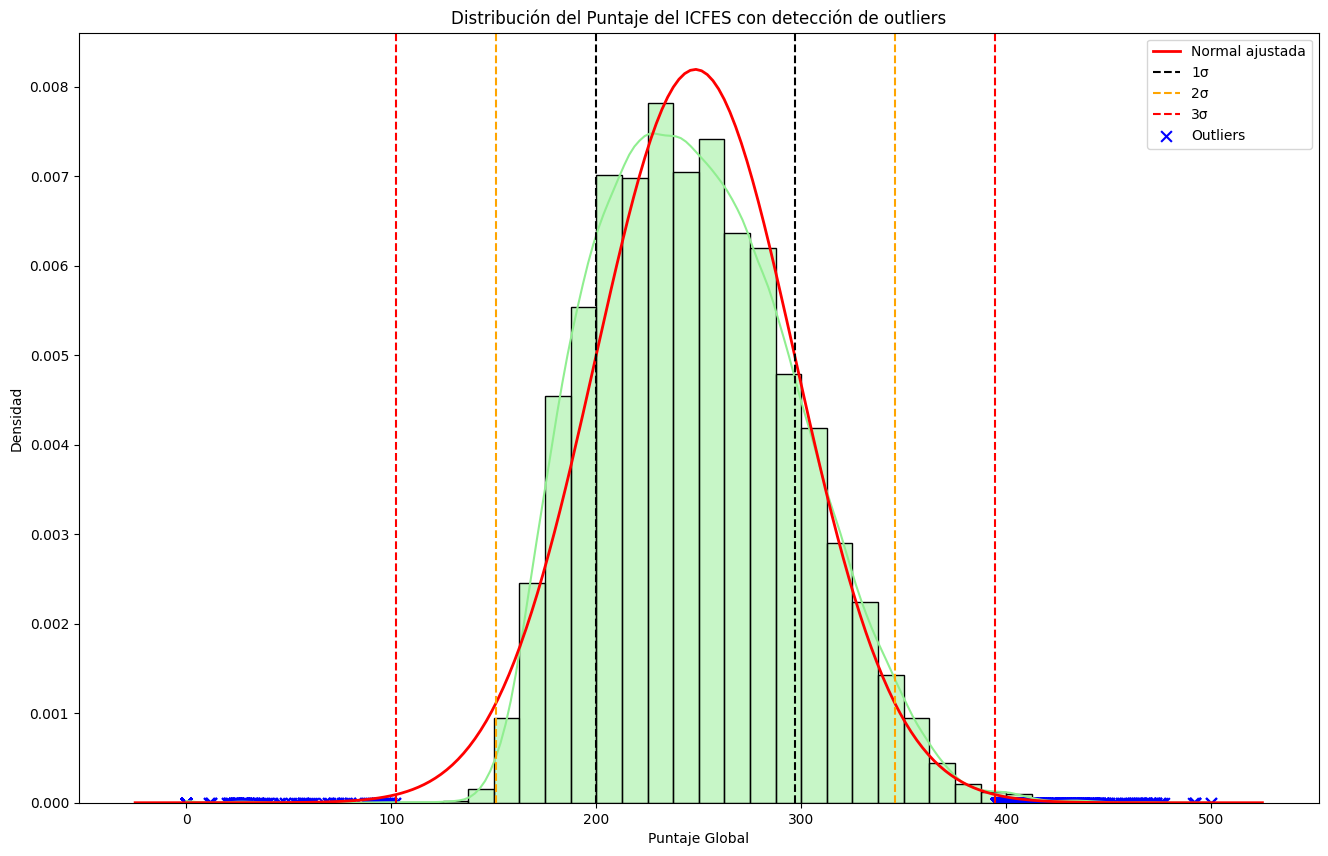

In [131]:
from scipy.stats import norm

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers (más allá de 3 desviaciones estándar)
outlier_idx = y.index[abs(z_scores) > 3]

# Crear DataFrame con índice, puntaje y z-score
df_outliers = pd.DataFrame({
    'indice': outlier_idx,
    'puntaje_global': y.loc[outlier_idx],
    'z_score': z_scores.loc[outlier_idx]
}).reset_index(drop=True)

# Ordenar por el valor del z-score
df_outliers = df_outliers.sort_values(by='z_score', ascending=False)

# Umbrales exactos de puntaje para ser considerado outlier
umbral_superior = mu + 3 * sigma
umbral_inferior = mu - 3 * sigma

print(f"Número de outliers detectados (|z| > 3): {len(df_outliers)}")
print(f"→ Se considera OUTLIER BAJO si el puntaje es menor a {umbral_inferior:.1f} puntos")
print(f"→ Se considera OUTLIER ALTO si el puntaje es mayor a {umbral_superior:.1f} puntos")



### Graficamos la distribución del puntaje en valores Z
plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=40, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución del Puntaje del ICFES con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

### 6. Guardar archivo limpio

In [132]:
from funciones_save_load import guardar_parquet

guardar_parquet(icfes, "icfes_limpio.parquet")

Archivo guardado en la carpeta data con el nombre de icfes_limpio.parquet
